# 0. Installation and imports

In [1]:
import pytorch_lightning as pl

from pytorch_lightning.loggers import WandbLogger

/home/gerard/PycharmProjects/Deforestation-Classification/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. EDA

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [149]:
train = pd.read_csv('./data/deforest/train.csv')
test = pd.read_csv('./data/deforest/test.csv')

In [150]:
train.head()

,label,latitude,longitude,year,images_path
0,0,-2.051853,111.826093,2001,images/train/1297.png
1,2,-1.989349,105.309496,2013,images/train/1199.png
2,0,1.223256,100.702217,2014,images/train/1348.png
3,0,-2.342948,103.890226,2008,images/train/2214.png
4,0,-0.126555,101.758175,2011,images/train/2220.png


In [151]:
label_to_name = {
    0: 'Plantation', 
    1: 'Grassland/Shrubland', 
    2: 'Smallholder Agriculture'
}

train['label_name'] = train['label'].map(label_to_name)
train.head()

,label,latitude,longitude,year,images_path,label_name
0,0,-2.051853,111.826093,2001,images/train/1297.png,Plantation
1,2,-1.989349,105.309496,2013,images/train/1199.png,Smallholder Agriculture
2,0,1.223256,100.702217,2014,images/train/1348.png,Plantation
3,0,-2.342948,103.890226,2008,images/train/2214.png,Plantation
4,0,-0.126555,101.758175,2011,images/train/2220.png,Plantation


<AxesSubplot: >

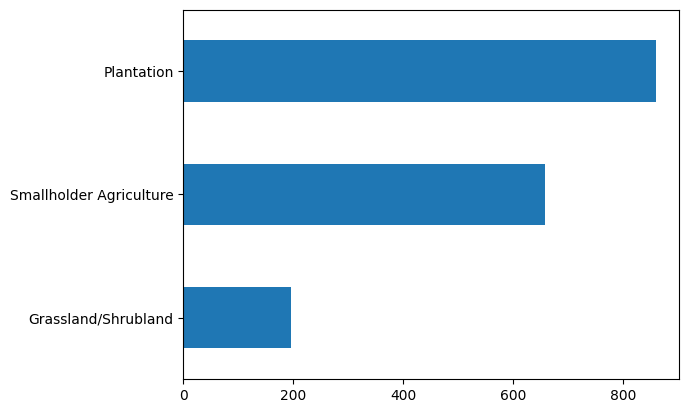

In [152]:
train['label_name'].value_counts().sort_values().plot(kind = 'barh')

In [153]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

root_data_dir = Path("./data/deforest").resolve()

In [106]:
metadata_0 = train[train.label == 0].sample()
metadata_0

,label,latitude,longitude,year,images_path,label_name
745,0,3.090005,117.284599,2005,images/train/1400.png,Plantation


In [107]:
image_path = root_data_dir / metadata_0["images_path"].item()
image_0 = np.array(Image.open(image_path))

In [108]:
histogram, bin_edges = np.histogram(normalize(image_0), bins=256, range=(0, 1))

Text(0, 0.5, 'Pixel count')

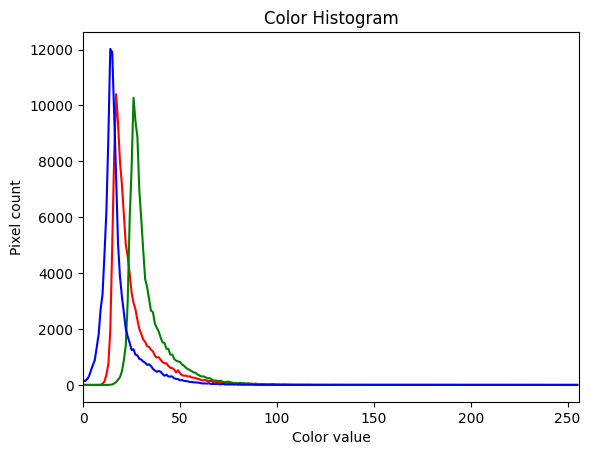

In [109]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        image_0[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

In [140]:
r = image_0[:,:,0]
r_norm = (r - r.mean()) / r.std()

In [144]:
import scipy

histogram, bin_edges = np.histogram(normalize(r_norm), bins=256, range=(0, 1))

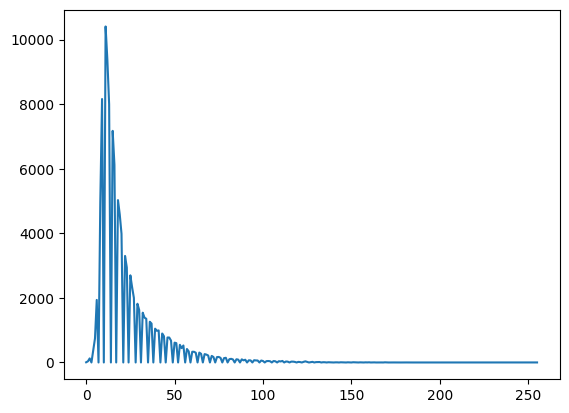

In [145]:
plt.plot(histogram)

In [ ]:
import scipy



In [127]:
histogram, bin_edges = np.histogram(normalize(weibull), bins=256, range=(0, 1))

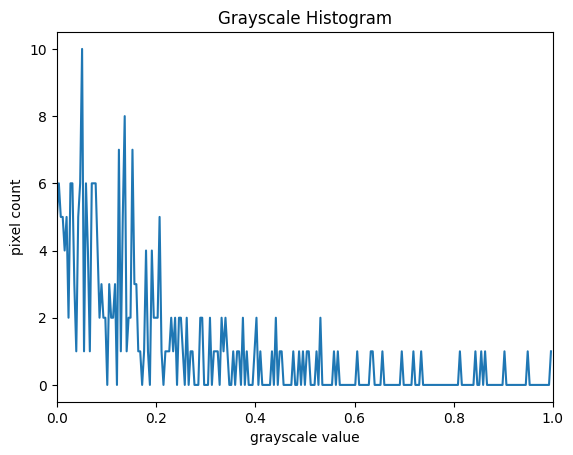

In [128]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)

In [95]:
image_0 = Image.open(image_path)

In [96]:
import random

def random_brightness(image):
    hsv = np.array(image.convert("HSV"))
    rand = random.uniform(0.1, 0.3)
    hsv[:, :, 2] = rand * hsv[:, :, 2]
    rand = random.uniform(0.1, 0.3)
    hsv[:, :, 1] = rand * hsv[:, :, 1]
    new_img = np.array(Image.fromarray(hsv).convert("RGB"))
    return new_img

In [97]:
image_0 = random_brightness(image_0)

In [98]:
histogram, bin_edges = np.histogram(normalize(image_0), bins=256, range=(0, 1))

Text(0, 0.5, 'Pixel count')

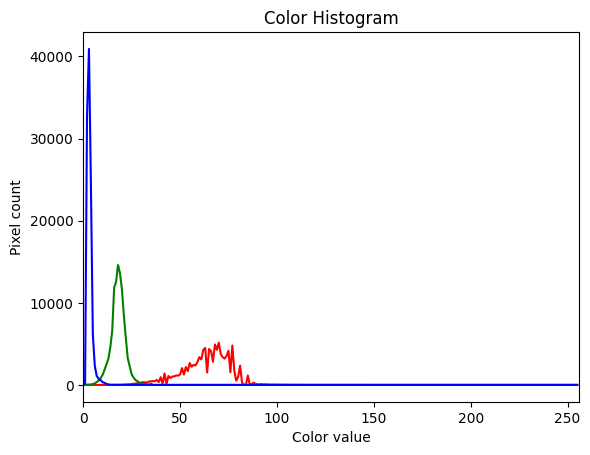

In [99]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        image_0[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

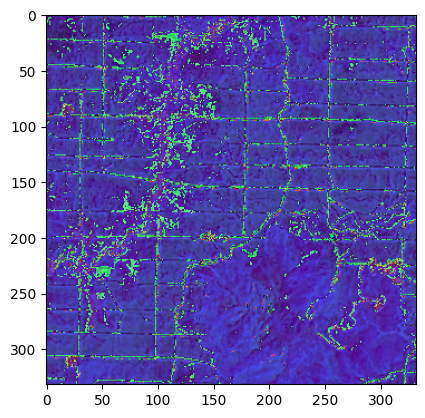

In [94]:
plt.imshow(image_0)

In [66]:
image_path = root_data_dir / metadata_0["images_path"].item()
image_0 = np.array(Image.open(image_path).convert('L'))

In [67]:
image_0.min(), image_0.max()

(14, 90)

In [68]:
def normalize(image):
    return (image - image.min()) / (image.max() - image.min())

In [69]:
histogram, bin_edges = np.histogram(normalize(np.log(image_0)), bins=256, range=(0, 1))

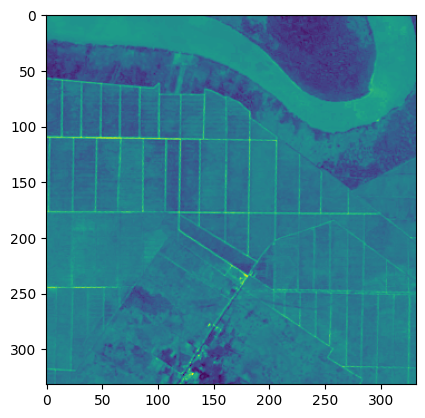

In [72]:
plt.imshow(normalize(np.log(image_0)))

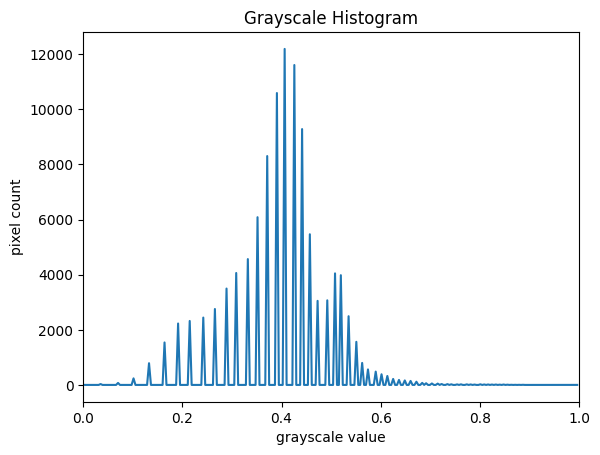

In [71]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)

In [154]:
metadata_1 = train[train.label == 1].sample()
metadata_1

,label,latitude,longitude,year,images_path,label_name
1523,1,-1.865272,114.86793,2016,images/train/1752.png,Grassland/Shrubland


In [155]:
image_path = root_data_dir / metadata_1["images_path"].item()
image_1 = np.array(Image.open(image_path))

In [156]:
image_1.min(), image_1.max()

(0, 92)

In [157]:
histogram, bin_edges = np.histogram(normalize(image_1), bins=256, range=(0, 1))

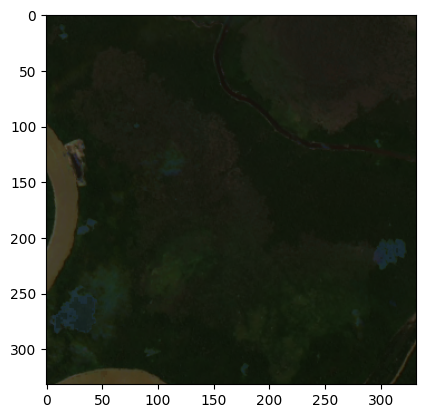

In [158]:
plt.imshow(image_1)

Text(0, 0.5, 'Pixel count')

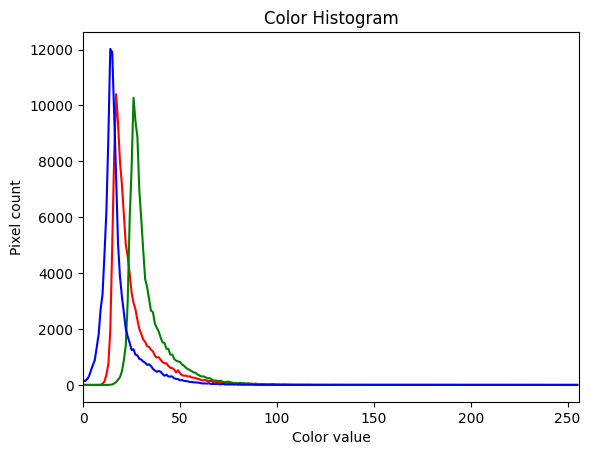

In [160]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        image_0[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

In [206]:
from torchvision import transforms
import torch

t = transforms.Compose([
                        transforms.RandomRotation(degrees=15),
                        transforms.CenterCrop(256)
                        ])

In [207]:
tmp = t(torch.tensor(image_1).permute((2, 0, 1)))

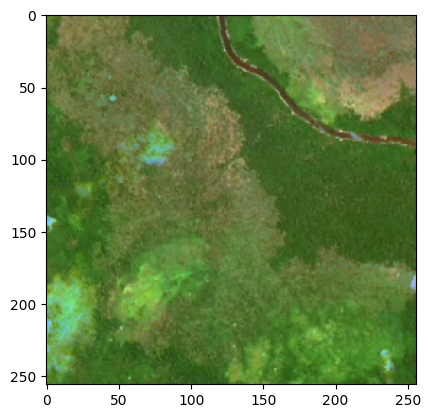

In [208]:
plt.imshow(normalize(np.array(tmp.permute((1, 2, 0)))))

In [58]:
metadata_2 = train[train.label == 2].sample()
metadata_2

,label,latitude,longitude,year,images_path,label_name
19,2,-4.737489,122.869165,2016,images/train/1109.png,Smallholder Agriculture


In [59]:
image_path = root_data_dir / metadata_2["images_path"].item()
image_2 = np.array(Image.open(image_path).convert('L'))

In [60]:
image_2.min(), image_2.max()

(4, 116)

In [61]:
histogram, bin_edges = np.histogram(normalize(image_2), bins=256, range=(0, 1))

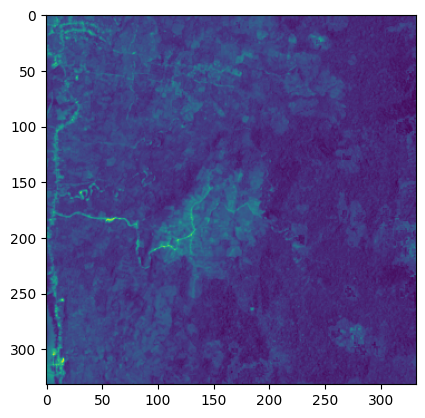

In [62]:
plt.imshow(image_2)

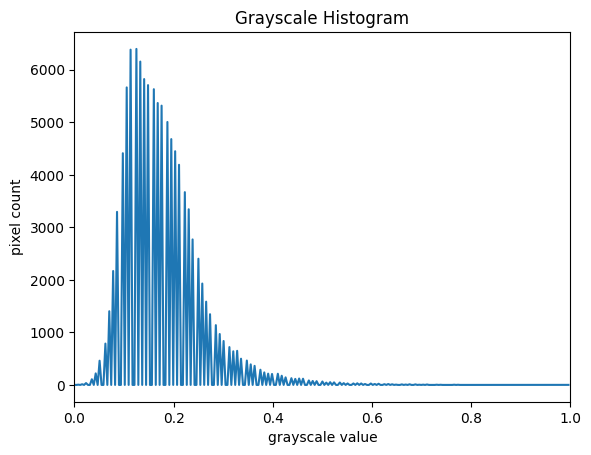

In [63]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)

# 2. DataModule

In [3]:
from typing import Dict, Optional, Union
from pathlib import Path

import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision

In [4]:
class ShipDataset(Dataset):
    """This dataset provides maritime scenes of optical aerial images from visible spectrum."""
    def __init__(self, root_data_dir: Union[str, Path], metadata_df: pd.DataFrame, transforms = None):
        self.root_data_dir = Path(root_data_dir)
        self.metadata_df = metadata_df
        self.transforms = transforms

    def __len__(self):
        return len(self.metadata_df)

    def __getitem__(self, idx):
        image_metadata = self.metadata_df.iloc[idx]
        image_file = self.root_data_dir / "images" / image_metadata["image"]
        image = torch.tensor(np.array(Image.open(image_file)))
        
        target = image_metadata["category"]
        sample = {"image": image, "target": target}

        if self.transforms:
            sample = self.transforms(sample["image"])

        return sample

In [7]:
class ShipDataModule(pl.LightningDataModule):
    def __init__(self, root_data_dir: str = './data', batch_size: int = 32, transforms: Dict = {"train": None, "valid": None, "test": None}):
        super().__init__()
        self.root_data_dir = Path(root_data_dir).resolve()
        self.batch_size = batch_size
        self.num_classes = 5
        
        self.transforms = transforms
        

    def prepare_data(self):
        """Define the logic to download the dataset or do any previous preprocessing."""

    def setup(self, stage: str = None):
        if stage == 'fit' or stage is None:
            full_train_metadata_df = pd.read_csv(self.root_data_dir / "train.csv")
            train_metadata_df, valid_metadata_df = train_test_split(full_train_metadata_df, test_size=0.1, random_state=0, stratify=full_train_metadata_df['category'])

            self.train_ds = ShipDataset(self.root_data_dir, train_metadata_df, transforms = self.transforms["train"])
            self.valid_ds = ShipDataset(self.root_data_dir, valid_metadata_df, transforms = self.transforms["valid"])

        if stage == 'test' or stage is None:
            test_metadata_df = pd.read_csv(self.root_data_dir / "test.csv")
            self.test_ds = ShipDataset(self.root_data_dir, test_metadata_df, transforms = self.transforms["test"])

    def train_dataloader(self):
        return DataLoader(self.train_ds, batch_size=self.batch_size, shuffle=True)


    def val_dataloader(self):
        return DataLoader(self.valid_ds, batch_size=self.batch_size)


    def test_dataloader(self):
        return DataLoader(self.test_ds, batch_size=self.batch_size)


In [8]:
dm = ShipDataModule()
dm.setup()

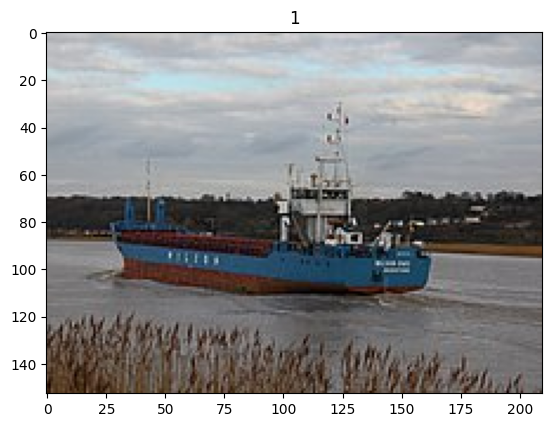

In [9]:
sample = dm.train_ds[np.random.randint(len(dm.train_ds))]
plt.imshow(sample["image"])
plt.title(sample["target"])
plt.show()

# 3. Callbacks

In [10]:
class ImagePredictionLogger(pl.Callback):
    def __init__(self, val_samples, num_samples=32):
        super().__init__()
        self.num_samples = num_samples
        self.val_imgs, self.val_labels = val_samples

def on_validation_epoch_end(self, trainer, pl_module):
        # Bring the tensors to CPU
        val_imgs = self.val_imgs.to(device=pl_module.device)
        val_labels = self.val_labels.to(device=pl_module.device)
        # Get model prediction
        logits = pl_module(val_imgs)
        preds = torch.argmax(logits, -1)
        # Log the images as wandb Image
        trainer.logger.experiment.log({
            "examples":[wandb.Image(x, caption=f"Pred:{pred}, Label:{y}") 
                           for x, pred, y in zip(val_imgs[:self.num_samples], 
                                                 preds[:self.num_samples], 
                                                 val_labels[:self.num_samples])]
            })


# 4. LightningModule

In [11]:
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics

In [12]:
class TimmModel(pl.LightningModule):

    def __init__(self, model, num_classes=5, learning_rate=1e-2):
        super().__init__()

        # log hyperparameters
        self.save_hyperparameters()
        self.learning_rate = learning_rate

        self.num_classes = num_classes
        self.model = self.create_timm_model(model)

        self.loss = F.cross_entropy
        self.accuracy = torchmetrics.Accuracy()

    def create_timm_model(self, model):
        model.classifier.out_features = self.num_classes

    def forward(self, x):
        # TODO: implement fastai model structure: backbone --> head so we can use self.num_classes to set the head output
        output = self.model(x)
        return output

    def training_step(self, batch, batch_idx):
        images, target = batch
        logits = self.forward(images)
        loss = self.loss(logits, target)

        # training metrics
        preds = torch.argmax(logits, dim=1)
        acc = self.accuracy(preds, target)
        self.log('train_loss', loss, on_step=True, on_epoch=True, logger=True)
        self.log('train_acc', acc, on_step=True, on_epoch=True, logger=True)

        return loss
    
    def validation_step(self, batch, batch_idx):
        images, target = batch
        logits = self.forward(images)
        loss = self.loss(logits, target)

        # validation metrics
        preds = torch.argmax(logits, dim=1)
        acc = self.accuracy(preds, target)
        self.log('val_loss', loss, on_step=True, on_epoch=True, logger=True)
        self.log('val_acc', acc, on_step=True, on_epoch=True, logger=True)

        return loss
        
    def test_step(self, batch, batch_idx):
        images, target = batch
        logits = self.forward(images)
        loss = self.loss(logits, target)
        
        # test metrics
        preds = torch.argmax(logits, dim=1)
        acc = self.accuracy(preds, target)
        self.log('test_loss', loss, prog_bar=True)
        self.log('test_acc', acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
        return {"optimizer": optimizer, "lr_scheduler": scheduler}

In [1]:
import timm

/home/gerard/PycharmProjects/Deforestation-Classification/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
timm.list_models()

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw

In [5]:
timm_model = timm.create_model('densenet201', pretrained=True, num_classes=5)  #https://rwightman.github.io/pytorch-image-models/
for param in timm_model.parameters():
    param.requires_grad = False

In [15]:
timm_model = timm.create_model('densenet201', pretrained=True)

In [16]:
model = TimmModel(timm_model, num_classes=5)

/home/gerard/PycharmProjects/Deforestation-Classification/venv/lib/python3.9/site-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  rank_zero_warn(


# 5. Transforms

List of transforms:

- RandomResizedCrop
- RandomRotation
- CenterCrop
- Normalize

In [17]:
from torchvision import transforms

In [18]:
train_transforms = transforms.Compose([
                                    transforms.RandomResizedCrop(256,scale=(0.8, 1.0),ratio=(0.75, 1.33)),
                                    transforms.RandomRotation(degrees=15),
                                    transforms.CenterCrop(224),
                                    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                   ])

In [19]:
valid_transforms = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                              ])

In [20]:
test_transforms = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                              ])

# 6. Train and Evaluate

In [21]:
# Init our data pipeline
transforms = {
    "train": train_transforms,
    "valid": valid_transforms,
    "test": test_transforms
    }
dm = ShipDataModule(batch_size=4, transforms=transforms)
dm.setup()

# Samples required by the custom ImagePredictionLogger callback to log image predictions.
val_samples = next(iter(dm.val_dataloader()))
val_imgs, val_labels = val_samples[0], val_samples[1]
val_imgs.shape, val_labels.shape

# Init our model
timm_model = timm.create_model('densenet201', pretrained=True)  #https://rwightman.github.io/pytorch-image-models/
model = TimmModel(timm_model, dm.num_classes)

# Initialize wandb logger
wandb_logger = WandbLogger(project='wandb-lightning', job_type='train')

# Initialize a trainer
trainer = pl.Trainer(max_epochs=50,
                     progress_bar_refresh_rate=20, 
                     gpus=1, 
                     logger=wandb_logger,
                     callbacks=[early_stop_callback,
                                ImagePredictionLogger(val_samples)],
                     checkpoint_callback=checkpoint_callback)


# Train the model ⚡🚅⚡
trainer.fit(model, dm)

# Evaluate the model on the held-out test set ⚡⚡
trainer.test()

# Close wandb run
wandb.finish()

: 

: 